In [1]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'

Mounted at /gdrive


# Data Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

pd.set_option('display.max_columns',None)  #to show all columns
dftrain=pd.read_csv(root+"train.csv").reset_index()  #reading dataset
dftest= pd.read_csv(root+"test.csv").reset_index()  #reading dataset
dftrain_copy=dftrain.copy()

In [3]:
dftrain.columns

Index(['index', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
s_time=time.time()
from prettytable import PrettyTable as pt
tb = pt()
showindex ='always'
#Add headers
tb.field_names = ["index","column","description"]
tb.align='l'
tb.align["index"] = "c"
tb.title='Description of data columns'

#Add rows
tb.add_row([1,"battery_power","Total energy a battery can store in mAh"])
tb.add_row([2,"blue","has bluetooth or not"])
tb.add_row([3,"clock_speed","Speed at which the microprocessor executes instructions"])
tb.add_row([4,"dual_sim","has dual sim support or not"])
tb.add_row([5,"fc","Mega pixel front camera"])
tb.add_row([6,"four_g","has 4G or not"])
tb.add_row([7,"int_memory","Internal memory in gigabytes"])
tb.add_row([8,"m_dep","Depth of the mobile in cm"])
tb.add_row([9,"mobile_wt","Mobile phone weight"])
tb.add_row([10,"n_cores","Number of processor cores"])
tb.add_row([11,"pc","Pixel Resolution Width"])
tb.add_row([12,"px_height","Resolution of pixels in height"])
tb.add_row([13,"px_width","Resolution of pixels in width"])
tb.add_row([14,"ram","RAM in megabytes"])
tb.add_row([15,"sc_h","Height of the mobile screen in cm"])
tb.add_row([16,"sc_w","Mobile screen width in cm"])
tb.add_row([17,"talk_time","Maximum battery usage time during a call"])
tb.add_row([18,"three_g","has 3G or not"])
tb.add_row([19,"touch_screen","has touch screen or not"])
tb.add_row([20,"wifi","has wifi or not"])
tb.add_row([21,"price_range","price ranges"])

print(tb)
print(f'run time : {time.time() - s_time}')

+---------------------------------------------------------------------------------+
|                           Description of data columns                           |
+-------+---------------+---------------------------------------------------------+
| index | column        | description                                             |
+-------+---------------+---------------------------------------------------------+
|   1   | battery_power | Total energy a battery can store in mAh                 |
|   2   | blue          | has bluetooth or not                                    |
|   3   | clock_speed   | Speed at which the microprocessor executes instructions |
|   4   | dual_sim      | has dual sim support or not                             |
|   5   | fc            | Mega pixel front camera                                 |
|   6   | four_g        | has 4G or not                                           |
|   7   | int_memory    | Internal memory in gigabytes                      

In [5]:
dftrain.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
s_time = time.time()
print("The dataset name :mobile price, train.csv ")
print("Number of features in dataset: ", len(dftrain.columns))
print("Number of records in dataset: ", len(dftrain))
print(f'run time : {time.time() - s_time}')

The dataset name :mobile price, train.csv 
Number of features in dataset:  22
Number of records in dataset:  2000
run time : 0.0027980804443359375


In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2000 non-null   int64  
 1   battery_power  2000 non-null   int64  
 2   blue           2000 non-null   int64  
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   int64  
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   int64  
 7   int_memory     2000 non-null   int64  
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             2000 non-null   int64  
 12  px_height      2000 non-null   int64  
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

In [ ]:
!pip install pyspark

In [9]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

In [10]:
s_time = time.time()
spark = SparkSession.builder.getOrCreate()
sdftrain = spark.createDataFrame(dftrain)
sdftrain.show()
print(f'run time : {time.time() - s_time}')

+-----+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|index|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|
+-----+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|    0|          842|   0|        2.2|       0|  1|     0|         7|  0.6|      188|      2|  2|       20|     756|2549|   9|   7|       19|      0|           0|   1|          1|
|    1|         1021|   1|        0.5|       1|  0|     1|        53|  0.7|      136|      3|  6|      905|    1988|2631|  17|   3|        7|      1|           1|   0|          2|
|    2|          563|   1|        0.5|       1|  2|     1|        41|  0.9|      145|      5|  6|   

In [11]:
s_time=time.time()
sdftrain.describe().show()
print(f'run time : {time.time() - s_time}')

+-------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|            index|    battery_power|              blue|       clock_speed|          dual_sim|               fc|             four_g|        int_memory|             m_dep|        mobile_wt|          n_cores|               pc|        px_height|          px_width|               ram|             sc_h|              sc_w|        talk_time|           three_g|     touch_screen|              wifi|       price_range|
+-------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+---

**Classification into 2 classes: expensive and cheap**

In [12]:
s_time = time.time()
from scipy.special.orthogonal import roots_hermitenorm

def classify(p):
    if p > 1.5 :
        x = 1
        return 1     # 1 for expensive mobile
    elif p <1.5 :
        return 0     # 0 for cheap mobile

dftrain['price_range'] = dftrain['price_range'].apply(classify)
print(dftrain['price_range'])
print(f'run time : {time.time() - s_time}')

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64
run time : 0.07740020751953125


In [13]:
s_time = time.time()
print("list of features and their types:")
print(dftrain.dtypes)
print(f'run time : {time.time() - s_time}')

list of features and their types:
index              int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object
run time : 0.01217198371887207


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


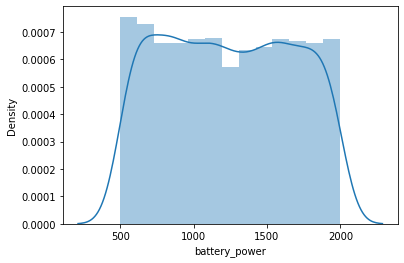

run time : 1.0947973728179932


In [14]:
s_time = time.time()
import seaborn as sns   
sns.distplot(dftrain['battery_power'])    
plt.show()
print(f'run time : {time.time() - s_time}')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


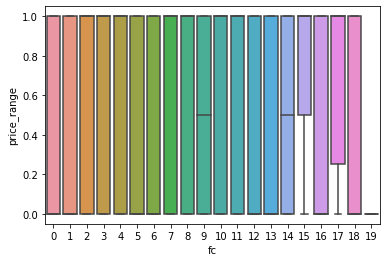

In [15]:
sns.boxplot(dftrain['fc'],dftrain['price_range'])
plt.show()

**Phones with 3G support**

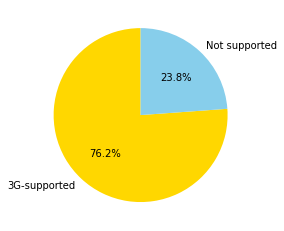

In [16]:
labels = ["3G-supported",'Not supported']
values = dftrain['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90,colors=colors)
plt.show()

**Phones with 4G support**

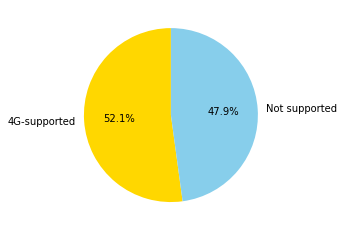

In [17]:
labels = ["4G-supported",'Not supported']
values = dftrain['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90,colors=colors)
plt.show()

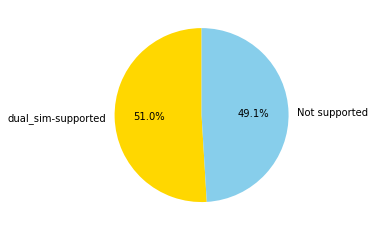

In [18]:
labels = ["dual_sim-supported",'Not supported']
values = dftrain['dual_sim'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

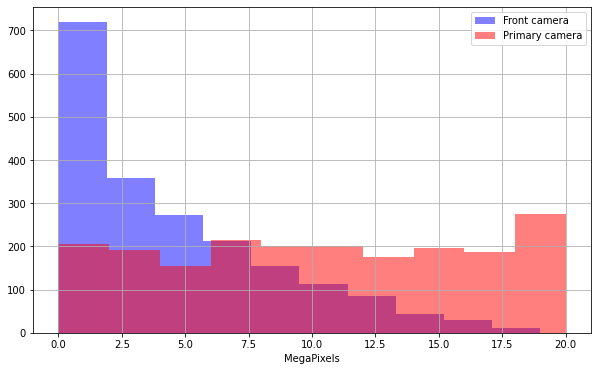

In [19]:
plt.figure(figsize=(10,6))
dftrain['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dftrain['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

# Preprocessing data

In [20]:
s_time = time.time()
print(dftrain.count(),"\n")
print(f'run time : {time.time() - s_time}')

index            2000
battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64 

run time : 0.005825042724609375


**Checking the missing data**

In [21]:
s_time = time.time()
print("number of null values in each column of train.csv:")
print(dftrain.isna().sum() ) #null count for each feature
print(f'run time : {time.time() - s_time}')

number of null values in each column of train.csv:
index            0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
run time : 0.002997159957885742


Normally, we fill NaN numeric data with mean of each column,but in this dataset there is no NaN data to fill

**Delete duplicates**

In [22]:
s_time = time.time()
print("deleting duplicate data...")
dftrain=dftrain.drop_duplicates() #delete duplicate records
print(f'run time : {time.time() - s_time}')

deleting duplicate data...
run time : 0.011349678039550781


**Delete  useless features (if such features exist):**

In [23]:
dftrain.keys()

Index(['index', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Dataset distribution plot before deleting outlier data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


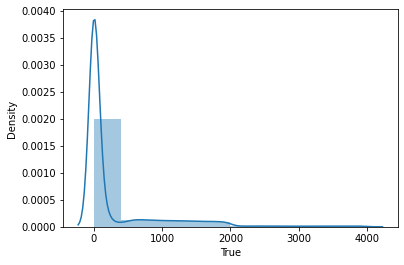

run time : 0.5466535091400146


In [24]:
s_time = time.time()
import seaborn as sns
sns.distplot(dftrain,bins=10, hist=True, kde=True,color=None, vertical=False,
             norm_hist=False, axlabel=True, label=None, ax=None, x=None)    
plt.show()
print(f'run time : {time.time() - s_time}')

**Data distribution visualizing**

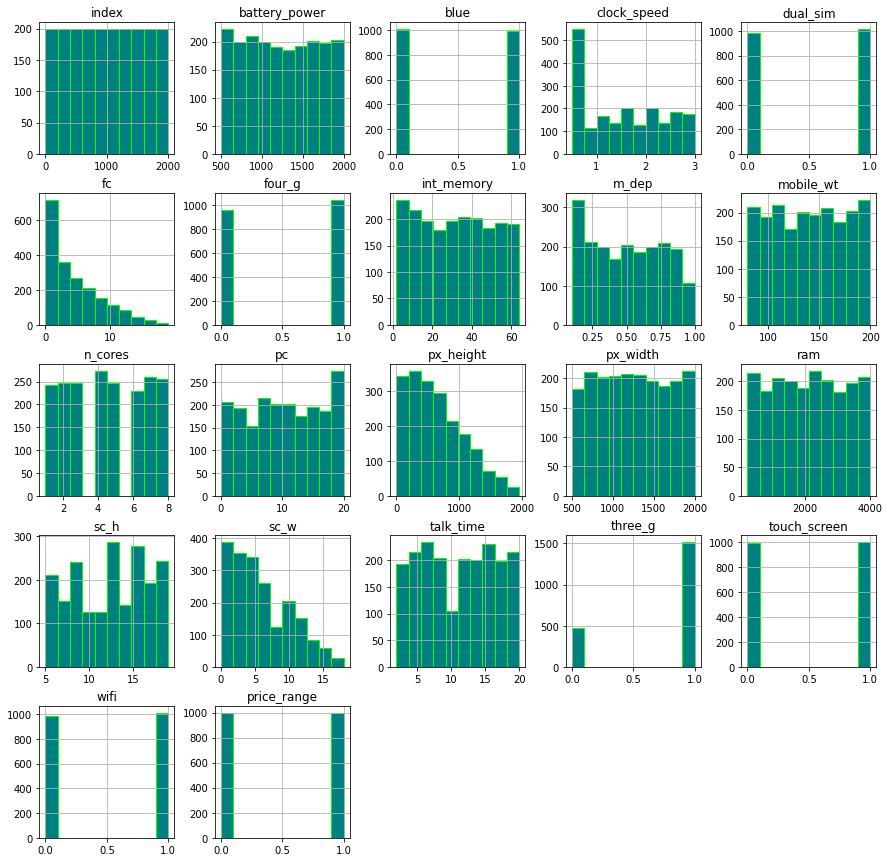

In [25]:
dftrain.hist(linewidth=1,figsize=(15, 15),color='teal',edgecolor='lime')
plt.show()

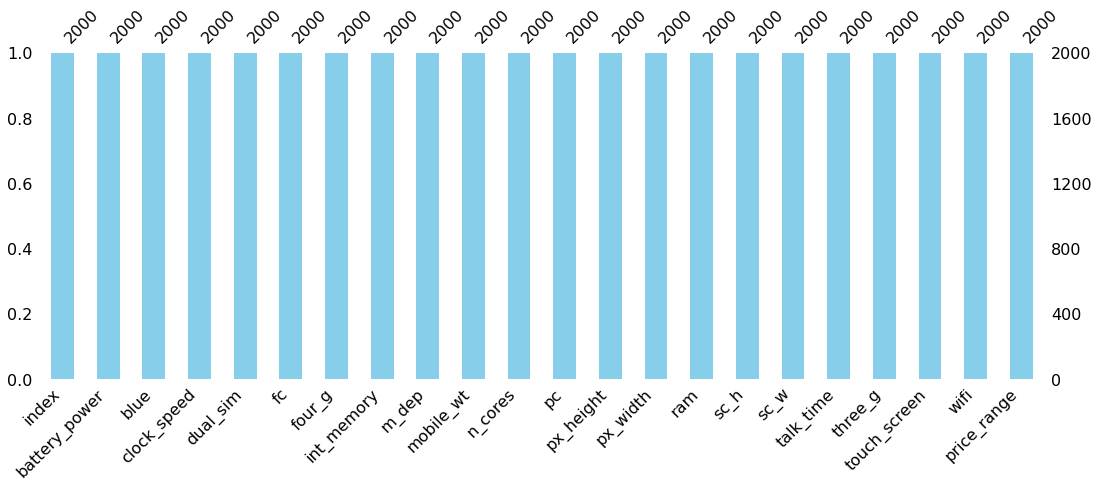

In [26]:
import missingno as msno
msno.bar(dftrain, figsize=(18, 6),color='skyblue')

**Data normalization**

In [27]:
for cols in dftrain.columns:
   if (dftrain[cols].dtypes == 'int64' or dftrain[cols].dtypes == 'float64'):
       dftrain[cols]=(dftrain[cols]-dftrain[cols].mean())/dftrain[cols].std()
       print(dftrain[cols])
       print('-------------------------------------')

0      -1.730752
1      -1.729021
2      -1.727289
3      -1.725557
4      -1.723826
          ...   
1995    1.723826
1996    1.725557
1997    1.727289
1998    1.729021
1999    1.730752
Name: index, Length: 2000, dtype: float64
-------------------------------------
0      -0.902372
1      -0.495015
2      -1.537302
3      -1.418964
4       1.325574
          ...   
1995   -1.011607
1996    1.653280
1997    1.530391
1998    0.622372
1999   -1.657916
Name: battery_power, Length: 2000, dtype: float64
-------------------------------------
0      -0.989802
1       1.009798
2       1.009798
3       1.009798
4       1.009798
          ...   
1995    1.009798
1996    1.009798
1997   -0.989802
1998   -0.989802
1999    1.009798
Name: blue, Length: 2000, dtype: float64
-------------------------------------
0       0.830572
1      -1.252751
2      -1.252751
3       1.198217
4      -0.394912
          ...   
1995   -1.252751
1996    1.320765
1997   -0.762557
1998   -0.762557
1999    0.585475
Name:

**deleting outliers**

In [28]:
for cols in dftrain.columns:
   if (dftrain[cols].dtypes == 'int64' or dftrain[cols].dtypes == 'float64'):
       upper_range=(dftrain[cols].mean()+3 )* dftrain[cols].std()
       lower_range=(dftrain[cols].mean()-3 )* dftrain[cols].std()

       indexes=dftrain[(dftrain[cols]>upper_range)|(dftrain[cols]< lower_range)].index
       dftrain=dftrain.drop(indexes)

In [29]:
dftrain.shape

(1988, 22)

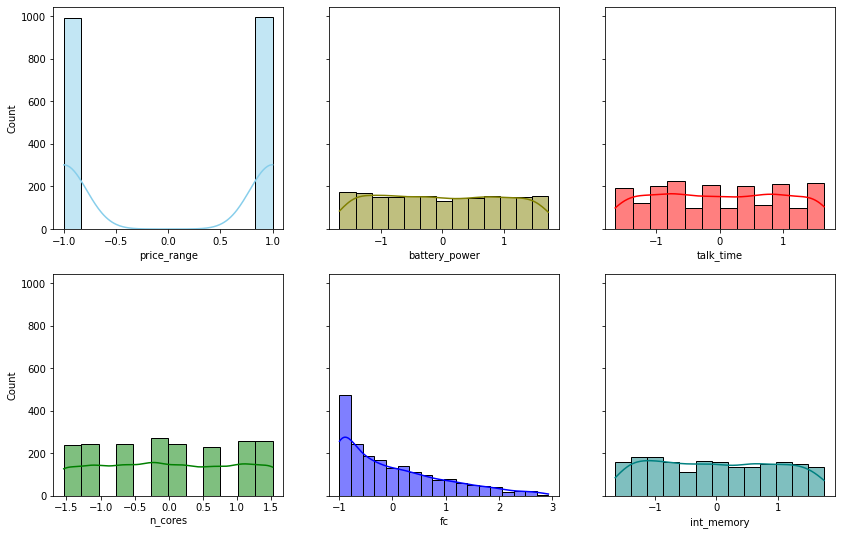

In [30]:
import matplotlib.pyplot as plt

#sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(14,9), sharey=True)

sns.histplot(data=dftrain, x="price_range", kde=True, color="skyblue", ax=axs[0, 0] )
sns.histplot(data=dftrain, x="battery_power", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dftrain, x="talk_time", kde=True, color="red", ax=axs[0, 2])
sns.histplot(data=dftrain, x="n_cores", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=dftrain, x="fc", kde=True, color="blue", ax=axs[1, 1])
sns.histplot(data=dftrain, x="int_memory", kde=True, color="teal", ax=axs[1, 2])
plt.show()

**Dataset distribution plot after deleting outlier data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


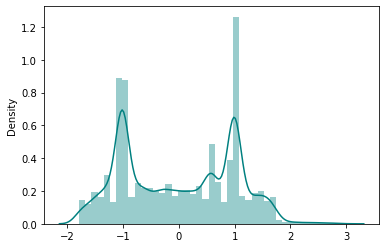

In [31]:
import seaborn as sns
sns.distplot(dftrain, kde=True, color="teal")    
plt.show()

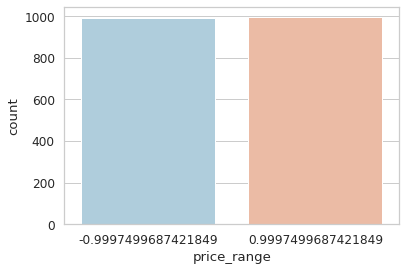

In [32]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
sns.countplot(x='price_range',data=dftrain,palette='RdBu_r')

We can see here that the distribution of price ranges is exactly 25% per price range - this was unexpected, but it also means that we won't need to apply any special methods to equalize the dataset .

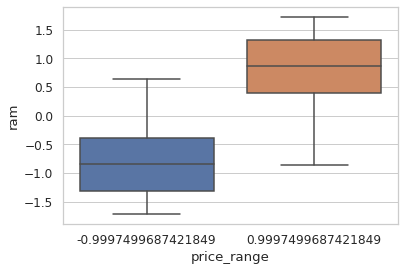

In [33]:
sns.boxplot(x="price_range", y="ram", data=dftrain)

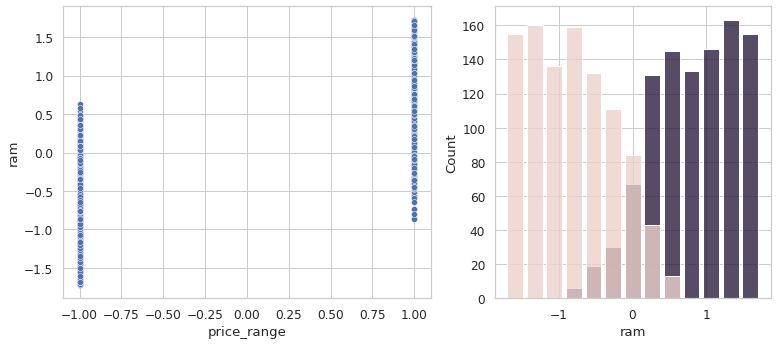

In [34]:
f, axs = plt.subplots(1, 2, figsize=(11,5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=dftrain, x="price_range", y="ram", ax=axs[0])
sns.histplot(data=dftrain, x="ram", hue="price_range", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

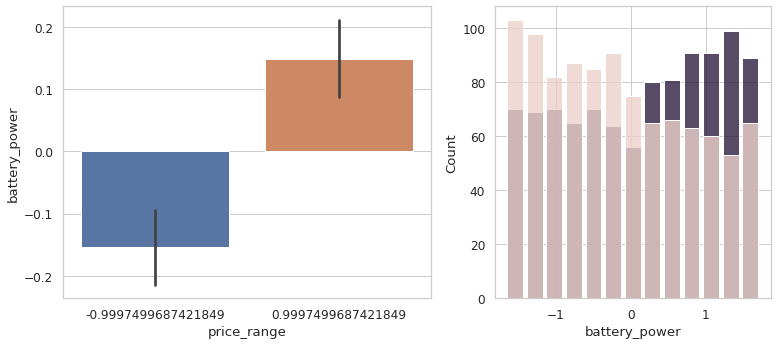

In [35]:
f, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw=dict(width_ratios=[4, 3]))
sns.barplot(data=dftrain, x="price_range", y="battery_power", ax=axs[0])
sns.histplot(data=dftrain, x="battery_power", hue="price_range", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

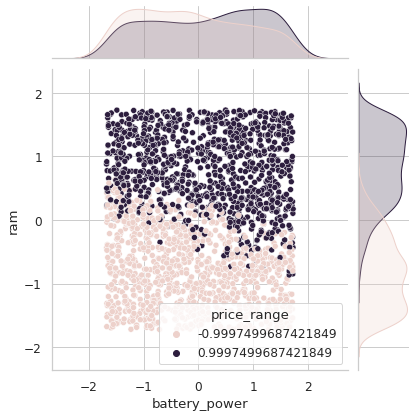

In [36]:
sns.jointplot(data=dftrain, x="battery_power", y="ram", hue="price_range")

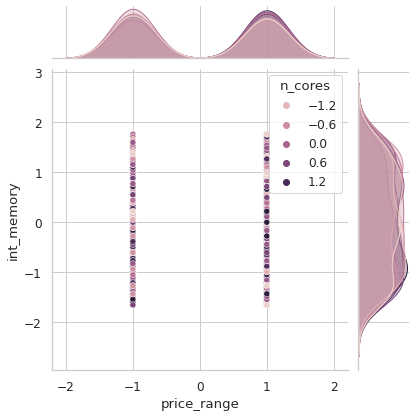

In [37]:
sns.jointplot(data=dftrain, x="price_range", y="int_memory", hue="n_cores")

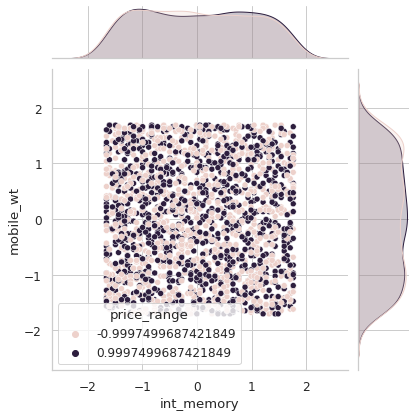

In [38]:
sns.jointplot(data=dftrain, x="int_memory", y="mobile_wt", hue="price_range")

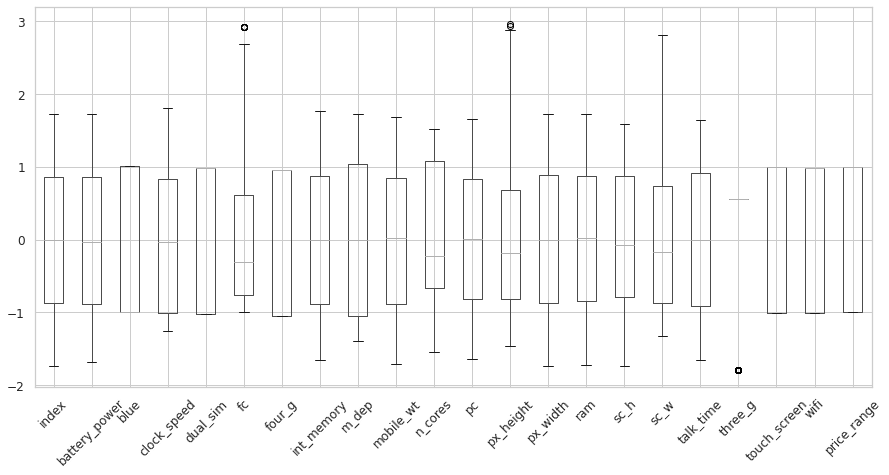

In [39]:
boxplot = dftrain.boxplot(figsize=(15,7),return_type='axes',rot=45)
plt.show()

# Correlation matrix

Correlation Coefficient value varies from -1 to +1, where:

1 is a perfect positive correlation
0 is no correlation
-1 is a perfect negative correlation
Correlation is Positive when the values increase together
Correlation is Negative when one value decreases as the other increases

[Text(0.5, 0, 'index'),
 Text(1.5, 0, 'battery_power'),
 Text(2.5, 0, 'blue'),
 Text(3.5, 0, 'clock_speed'),
 Text(4.5, 0, 'dual_sim'),
 Text(5.5, 0, 'fc'),
 Text(6.5, 0, 'four_g'),
 Text(7.5, 0, 'int_memory'),
 Text(8.5, 0, 'm_dep'),
 Text(9.5, 0, 'mobile_wt'),
 Text(10.5, 0, 'n_cores'),
 Text(11.5, 0, 'pc'),
 Text(12.5, 0, 'px_height'),
 Text(13.5, 0, 'px_width'),
 Text(14.5, 0, 'ram'),
 Text(15.5, 0, 'sc_h'),
 Text(16.5, 0, 'sc_w'),
 Text(17.5, 0, 'talk_time'),
 Text(18.5, 0, 'three_g'),
 Text(19.5, 0, 'touch_screen'),
 Text(20.5, 0, 'wifi'),
 Text(21.5, 0, 'price_range')]

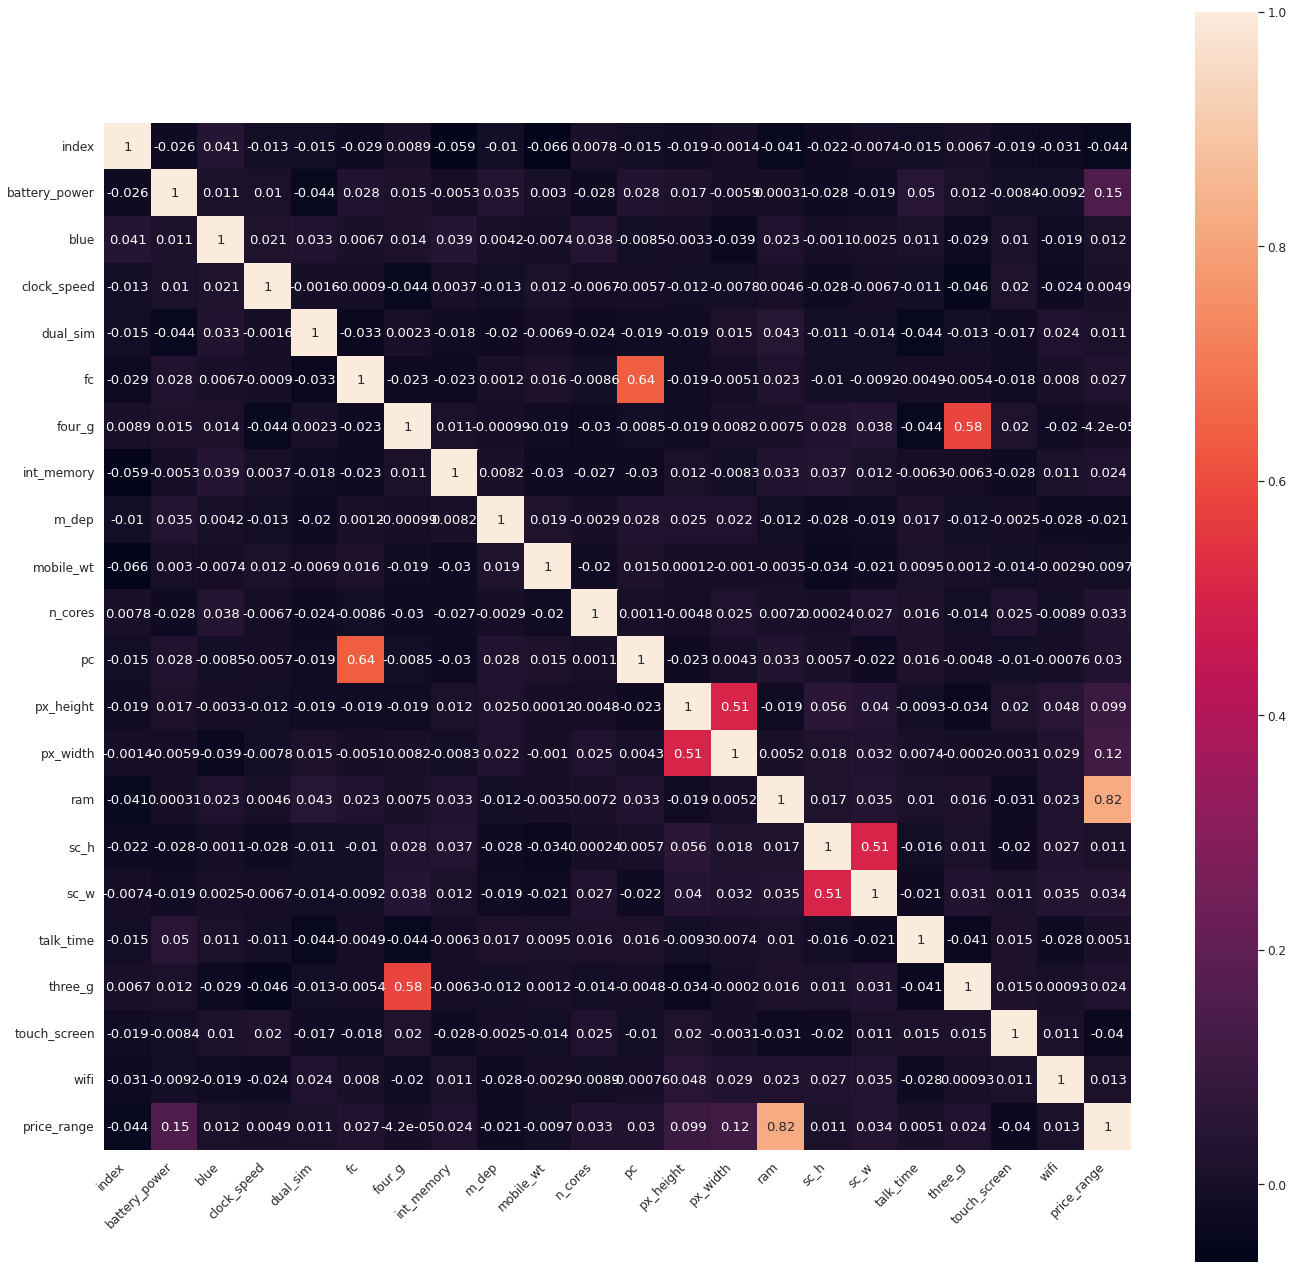

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=dftrain.corr()
f,ax=plt.subplots(figsize=(23,23))
ax = sns.heatmap(corr, center=None,annot=True,cmap=None,square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

# Feature selection using Feed Forward method

**Area Under the Curve (AUC)**

The AUC is a metric that is analogous to a binary model’s concordance, or c-statistic. This is the probability that an observation with a positive class will have a greater predicted probability than an observation in a negative class.

so,


> If AUC = 1, it means there is perfect prediction by the model

> If AUC = 0.5, it would mean the model is unable to discriminate between classes

It also behaves similarly to r-square in logistic regression, in that adding more predictors will increase the AUC. Therefore, it is important to include cross-validation or validation on external data in the analysis.

**AUC - ROC curve** is a performance measurement for the classification problems at various threshold settings.

**ROC** is a probability curve and **AUC** represents the degree or measure of separability. 

It tells how much the model is capable of distinguishing between classes

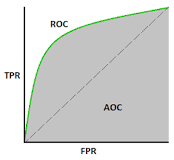

In [41]:
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [42]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [43]:
# Transformers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [44]:
X = dftrain.drop(['price_range'], axis=1)
y = dftrain['price_range']
y = LabelEncoder().fit_transform(y)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, shuffle=True)
print(X.shape)
print(y.shape)
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

(1988, 21)
(1988,)
X_train.shape: (1391, 21)
X_test.shape: (597, 21)
y_train.shape: (1391,)
y_test.shape: (597,)


In [45]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 24.4 MB/s 
     |████████████████████████████████| 596 kB 35.3 MB/s 
     |████████████████████████████████| 6.6 MB 52.7 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**Logistic regression on all features**

In [46]:
from sklearn.linear_model import LogisticRegression

from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

X_train_all = pd.DataFrame(data=X_train, columns=X_train.columns)
X_test_all = pd.DataFrame(data=X_test, columns=X_test.columns)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train_all, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])

pipe.score(X_test_all, y_test) 

0.9966499162479062

**All features confusion matrix**

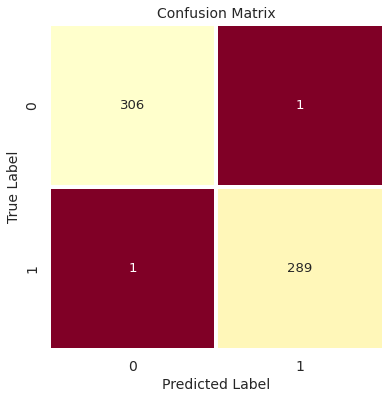

------------------------------------------------------------------
Confusion matrix (all features) : 
 [[289   1]
 [  1 306]]
------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       290
           0       1.00      1.00      1.00       307

    accuracy                           1.00       597
   macro avg       1.00      1.00      1.00       597
weighted avg       1.00      1.00      1.00       597

------------------------------------------------------------------
The different values of the Confusion matrix would be as follows:
------------------------------------------------------------------
True Positive (TP) = 289 	meaning 289 positive class data points were correctly classified by the model
True Negative (TN) = 306 	meaning 306 negative class data points were correctly classified by the model
False Positive (FP) = 1 	meaning 1 negative cl

In [47]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
model1 = LogisticRegression()

# fit model
model1.fit(X_train_all, y_train)

# predicted values
predicted = model1.predict(X_test_all)


cm = confusion_matrix(actual, predicted)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True, fmt= '.0f',ax=ax,linewidths = 3, cbar = False,cmap='YlOrRd_r')
plt.xlabel("Predicted Label", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 90)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print("------------------------------------------------------------------")
print('Confusion matrix (all features) : \n',matrix)
print("------------------------------------------------------------------")
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)
print("------------------------------------------------------------------")
print("The different values of the Confusion matrix would be as follows:")
print("------------------------------------------------------------------")
print(f"True Positive (TP) = { tp } \tmeaning {tp} positive class data points were correctly classified by the model")
print(f"True Negative (TN) = { tn } \tmeaning { tn } negative class data points were correctly classified by the model")
print(f"False Positive (FP) = { fp } \tmeaning { fp } negative class data points were incorrectly classified as belonging to the positive class by the model")
print(f"False Negative (FN) = { fn } \tmeaning { fn } positive class data points were incorrectly classified as belonging to the negative class by the model")

**Forward Feature Selection by AUC**

This forward selection function accepts data and target variable, and returns the final list of significant features based on AUC through forward selection

- Input : a Dataframe, number of required features n
- Output : Set of n features which are most useful for model performance


In [48]:
def ForwardFeatureSelect(X_train, y_train,n):

    initial_features = dftrain.columns.tolist()
    best_features = []
    init_auc = 0.55

    # train models
    from sklearn.linear_model import LogisticRegression

    # logistic regression
    model1 = LogisticRegression()

    from prettytable import PrettyTable as pt
    tb = pt()
    tb.field_names = ["index","column","auc_score1 (LR)"]
    tb.align='l'
    tb.align["index"] = "c"
    tb.title='selected features based on AUC through forward selection'
    i=0

    for new_feature in initial_features:

        best_features.append(new_feature)
        X_train_f = pd.DataFrame(data=X_train, columns=best_features)
        X_test_f = pd.DataFrame(data=X_test, columns=best_features)

        # fit model
        model1.fit(X_train_f, y_train)

        # predict probabilities
        pred_prob1 = model1.predict_proba(X_test_f)

        from sklearn.metrics import roc_curve

        # roc curve for models
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

        # roc curve for tpr = fpr 
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


        from sklearn.metrics import roc_auc_score

        # auc scores
        auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

        if  auc_score1 > init_auc :
            init_auc =  auc_score1
            tb.add_row([i+1,new_feature,  auc_score1])
        else:
          best_features.pop()
        if len(best_features) == n:
          break 
        i=i+1
    print(tb)

    return best_features

In [49]:
best_features=ForwardFeatureSelect(X,y,6)

+----------------------------------------------------------+
| selected features based on AUC through forward selection |
+---------+--------------------+---------------------------+
|  index  | column             | auc_score1 (LR)           |
+---------+--------------------+---------------------------+
|    2    | battery_power      | 0.5951645512748511        |
|    4    | clock_speed        | 0.5955576771874649        |
|    5    | dual_sim           | 0.5968774570369538        |
|    6    | fc                 | 0.5976749410311132        |
|    7    | four_g             | 0.5978995844097496        |
|    8    | int_memory         | 0.5995170167359317        |
+---------+--------------------+---------------------------+


**logistic regression on best selected features**

In [50]:
# train models
from sklearn.linear_model import LogisticRegression

# logistic regression
model1 = LogisticRegression()

X_train_features = pd.DataFrame(data=X_train, columns=best_features)
X_test_features = pd.DataFrame(data=X_test, columns=best_features)

# fit model
model1.fit(X_train_features, y_train)


# predict probabilities
pred_prob_features_1 = model1.predict_proba(X_test_features)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_features_1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_features_1[:,1])
print('auc score (logistic regression):',auc_score1)

auc score (logistic regression): 0.5923171964506346


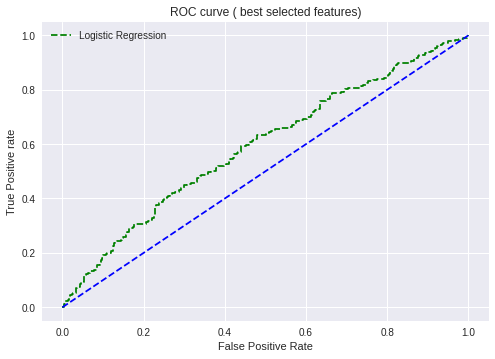

In [51]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve ( best selected features)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Logistic regression on best selected features (using pipeline)**

In [52]:
X_train1 = pd.DataFrame(data=X_train, columns=best_features)
X_test1 = pd.DataFrame(data=X_test, columns=best_features)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train1, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])

pipe.score(X_test1, y_test) 

0.5661641541038526

Selected features confusion matrix

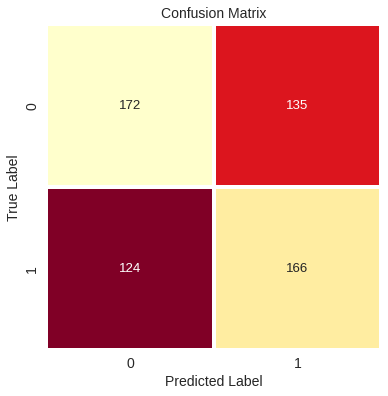

------------------------------------------------------------------
Confusion matrix (best features): 
 [[166 124]
 [135 172]]
------------------------------------------------------------------
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.57      0.56       290
           0       0.58      0.56      0.57       307

    accuracy                           0.57       597
   macro avg       0.57      0.57      0.57       597
weighted avg       0.57      0.57      0.57       597

------------------------------------------------------------------
The different values of the Confusion matrix would be as follows:
------------------------------------------------------------------
True Positive (TP) = 166 	meaning 166 positive class data points were correctly classified by the model
True Negative (TN) = 172 	meaning 172 negative class data points were correctly classified by the model
False Positive (FP) = 135 	meaning 135 negativ

In [53]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test

# predicted values
predicted = model1.predict(X_test1)

cm = confusion_matrix(actual, predicted)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True, fmt= '.0f',ax=ax,linewidths = 3, cbar = False,cmap='YlOrRd_r')
plt.xlabel("Predicted Label", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 90)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print("------------------------------------------------------------------")
print('Confusion matrix (best features): \n',matrix)
print("------------------------------------------------------------------")
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)
print("------------------------------------------------------------------")
print("The different values of the Confusion matrix would be as follows:")
print("------------------------------------------------------------------")
print(f"True Positive (TP) = { tp } \tmeaning {tp} positive class data points were correctly classified by the model")
print(f"True Negative (TN) = { tn } \tmeaning { tn } negative class data points were correctly classified by the model")
print(f"False Positive (FP) = { fp } \tmeaning { fp } negative class data points were incorrectly classified as belonging to the positive class by the model")
print(f"False Negative (FN) = { fn } \tmeaning { fn } positive class data points were incorrectly classified as belonging to the negative class by the model")

calculate precision-recall curve and LogisticRegression

No Skill: ROC AUC=0.50000
Logistic: ROC AUC=0.59232


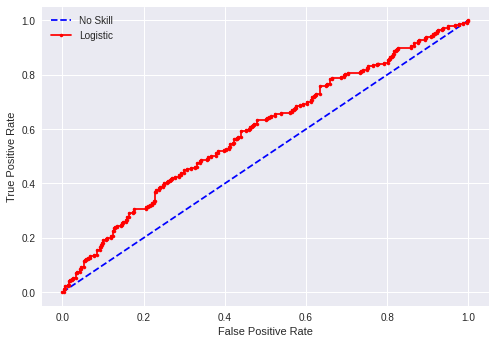

In [54]:
# generate a no skill prediction 
ns_probs = [0 for _ in range(len(y_test))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train1, y_train)

lr_probs = model.predict_proba(X_test1)  # predict probabilities

lr_probs = lr_probs[:, 1]  # keep probabilities for the positive outcome only

ns_auc = roc_auc_score(y_test, ns_probs)  # calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.5f' % (ns_auc))
print('Logistic: ROC AUC=%.5f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)   # fpr=false positive rates 
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)   # tpr=true positive rates

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--',color='blue', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.',color='red', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# PCA
Principal Component Analysis

In [55]:
data=pd.read_csv(root+"train.csv").reset_index()  #reading dataset
data.shape

(2000, 22)

In [56]:
data.head()

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


we devide our features into Categorical and numerical features

In [57]:
cat_vals = ["blue", "dual_sim", "four_g", "wifi", "touch_screen", "three_g"]
num_vals = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt",
            "n_cores", "pc", "px_height", "px_width", "ram",
            'sc_h', 'sc_w', 'talk_time'
           ]
# We verify if we included all the features
print(len(cat_vals) + len(num_vals) == data.shape[1] - 2)

True


In [58]:
# features
X = data[data.columns[1:-1]]
# target
Y = data[["price_range"]]

In [59]:
# Categorical features
X_cat = X[cat_vals]
# Numerical features
X_num = X[num_vals]

**Principal component analysis - Categorical**

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6) #number of best selected features by forward selection
X_transf= pca.fit_transform(X_cat)

print(pca.explained_variance_ratio_)

[0.24102702 0.18110299 0.17794637 0.17588663 0.16377644 0.06026055]


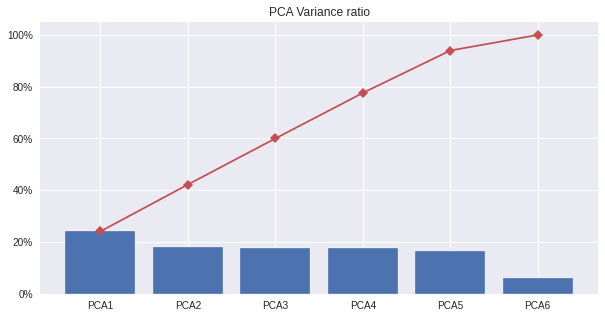

In [61]:
from matplotlib.ticker import PercentFormatter

variance_ratio_cumul = list(pca.explained_variance_ratio_.cumsum() * 100)
variance_ratio = list(pca.explained_variance_ratio_ * 100)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot([f"PCA{i}" for i in range(1,len(variance_ratio_cumul)+1)], variance_ratio_cumul, "r", marker="D", label="Variance ratio cumul")
plt.bar(range(len(variance_ratio_cumul)), variance_ratio, label="Variance ratio")
plt.title("PCA Variance ratio")
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

**Note:**
Using PCA is not worth it for categorical values, to get 80% of the information we need to use 4 out of 6 features.

**Principal component analysis - Numercial**

In [62]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)
pca = PCA(n_components=14)
X_transf= pca.fit_transform(X_num_scaled)

print("pca result with 14 components :")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

pca result with 14 components :
[0.104791   0.1002422  0.0920569  0.09092073 0.08895069 0.08377617
 0.07937965 0.07514333 0.07228079 0.06989109 0.06843824 0.02915943
 0.02543118 0.0195386 ]
[0.104791   0.2050332  0.2970901  0.38801083 0.47696152 0.56073769
 0.64011734 0.71526067 0.78754146 0.85743255 0.92587079 0.95503022
 0.9804614  1.        ]


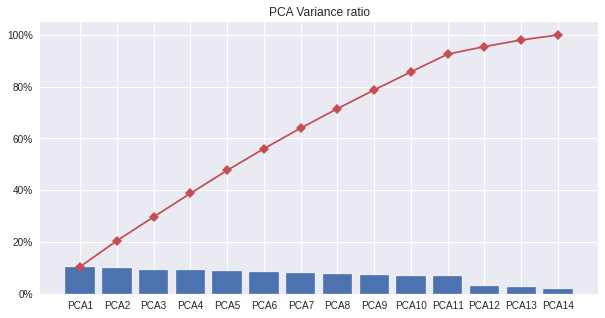

In [63]:
variance_ratio_cumul = list(pca.explained_variance_ratio_.cumsum() * 100)
variance_ratio = list(pca.explained_variance_ratio_ * 100)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot([f"PCA{i}" for i in range(1,len(variance_ratio_cumul)+1)], variance_ratio_cumul, "r", marker="D", label="Variance ratio cumul")
plt.bar(range(len(variance_ratio_cumul)), variance_ratio, label="Variance ratio")
plt.title("PCA Variance ratio")
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

In [64]:
pca = PCA(n_components=6)  #number of best selected features by forward selection is 6
X_transf= pca.fit_transform(X_num)

print("pca result with 6 components :")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

pca result with 6 components :
[6.70439958e-01 1.65179263e-01 1.10061684e-01 5.33450038e-02
 7.14285533e-04 1.87074111e-04]
[0.67043996 0.83561922 0.94568091 0.99902591 0.99974019 0.99992727]


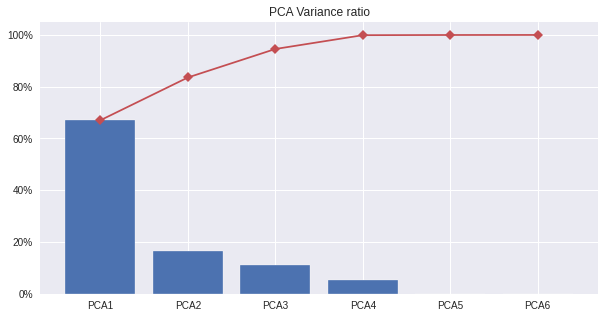

In [65]:
variance_ratio_cumul = list(pca.explained_variance_ratio_.cumsum() * 100)
variance_ratio = list(pca.explained_variance_ratio_ * 100)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot([f"PCA{i}" for i in range(1,len(variance_ratio_cumul)+1)], variance_ratio_cumul, "r", marker="D", label="Variance ratio cumul")
plt.bar(range(len(variance_ratio_cumul)), variance_ratio, label="Variance ratio")
plt.title("PCA Variance ratio")
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

**Note:**
We can CLEARLY see that we can conserve up to 99% of our data's information using only 4 components out of 14.

**Data processing**

In [66]:
pca = PCA(n_components=4)
X_transf= pca.fit_transform(X_num)
data["X_PCA1"] = X_transf[:, 0]
data["X_PCA2"] = X_transf[:, 1]
data["X_PCA3"] = X_transf[:, 2]
data["X_PCA4"] = X_transf[:, 3]

we take our X as follows

In [67]:
# feature is now made of the four components of the PCA and the categorical values
features = ["X_PCA1", "X_PCA2", "X_PCA3", "X_PCA4"] + cat_vals
X_training = data[features]
X_training.head()

,X_PCA1,X_PCA2,X_PCA3,X_PCA4,blue,dual_sim,four_g,wifi,touch_screen,three_g
0,430.597105,-795.788278,-390.070331,55.636198,0,0,0,1,0,0
1,504.984729,696.622407,-235.629077,343.925952,1,1,1,0,1,1
2,473.329822,763.942174,-680.059464,-113.916908,1,1,1,0,1,1
3,639.822326,779.691218,-630.783687,-30.402214,1,0,0,0,0,1
4,-718.985171,382.304561,591.040320,-392.357215,1,0,1,0,1,1


Train test split

In [68]:
# Train test split 67% 33%
X_train, X_test, y_train, y_test = train_test_split(X_training, Y, test_size=0.33)
y_train_fit = y_train.to_numpy().ravel()

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1340, 10)
(660, 10)
(1340, 1)
(660, 1)


**Logistic regression**

In [70]:
%matplotlib inline

In [71]:
from sklearn.linear_model import LogisticRegression

# logistic regression
LR = LogisticRegression()

# fit model
LR.fit(X_train, y_train_fit)
# train models

# predict probabilities
pred_prob1 = LR.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [72]:
print(LR.__class__.__name__ ,": ", LR.score(X_test,y_test))

LogisticRegression :  0.8878787878787879


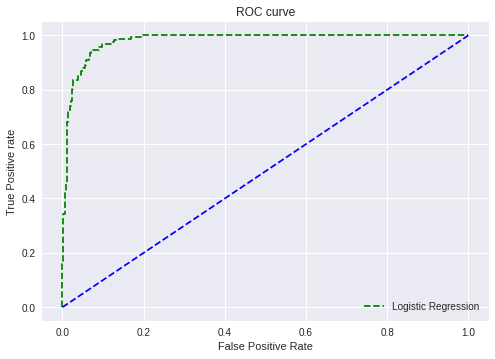

In [73]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [74]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# confusion matrix
y_pred = LR.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[148  11   0   0]
 [ 23 140   3   0]
 [  0   8 140  22]
 [  0   0   7 158]]


------------------------------------------------------------------
Confusion matrix : 
 [[166 124]
 [135 172]]
------------------------------------------------------------------


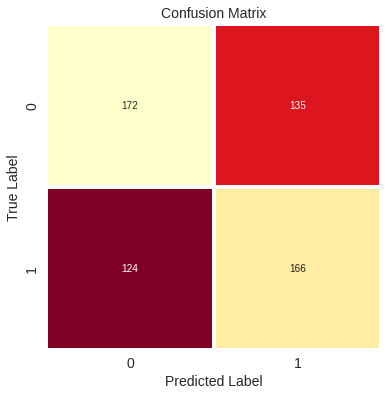

Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.57      0.56       290
           0       0.58      0.56      0.57       307

    accuracy                           0.57       597
   macro avg       0.57      0.57      0.57       597
weighted avg       0.57      0.57      0.57       597

------------------------------------------------------------------
The different values of the Confusion matrix would be as follows:
------------------------------------------------------------------
True Positive (TP) = 166 	meaning 166 positive class data points were correctly classified by the model
True Negative (TN) = 172 	meaning 172 negative class data points were correctly classified by the model
False Positive (FP) = 135 	meaning 135 negative class data points were incorrectly classified as belonging to the positive class by the model
False Negative (FN) = 124 	meaning 124 positive class data points were incorrectly classified as 

In [75]:
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print("------------------------------------------------------------------")
print('Confusion matrix : \n',matrix)
print("------------------------------------------------------------------")
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True, fmt= '.0f',ax=ax,linewidths = 3, cbar = False,cmap='YlOrRd_r')
plt.xlabel("Predicted Label", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 90)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)
print("------------------------------------------------------------------")
print("The different values of the Confusion matrix would be as follows:")
print("------------------------------------------------------------------")
print(f"True Positive (TP) = { tp } \tmeaning {tp} positive class data points were correctly classified by the model")
print(f"True Negative (TN) = { tn } \tmeaning { tn } negative class data points were correctly classified by the model")
print(f"False Positive (FP) = { fp } \tmeaning { fp } negative class data points were incorrectly classified as belonging to the positive class by the model")
print(f"False Negative (FN) = { fn } \tmeaning { fn } positive class data points were incorrectly classified as belonging to the negative class by the model")

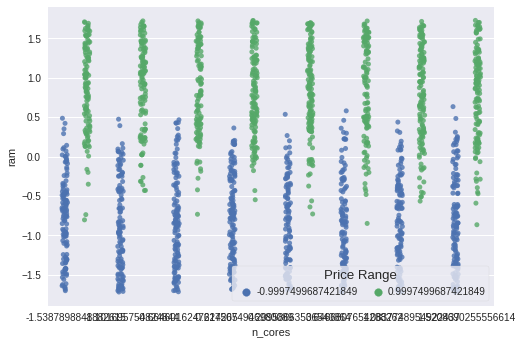

In [76]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
ax.figsiz=(15,15)
sns.stripplot(x="n_cores", y="ram", hue="price_range",
              data=dftrain, dodge=True, jitter=True,  alpha=.8, zorder=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend( title="Price Range", handletextpad=0, columnspacing=1,
          loc="best", ncol=2, frameon=True)

In [77]:
print(classification_report(y_test, y_pred, target_names = ['n_cores','ram','battery_power','int_memory']))

               precision    recall  f1-score   support

      n_cores       0.87      0.93      0.90       159
          ram       0.88      0.84      0.86       166
battery_power       0.93      0.82      0.87       170
   int_memory       0.88      0.96      0.92       165

     accuracy                           0.89       660
    macro avg       0.89      0.89      0.89       660
 weighted avg       0.89      0.89      0.89       660



In [78]:
print(accuracy_score(y_test, y_pred))

0.8878787878787879


# Feature engineering

## **1.Binning**

In [79]:
dftrain.battery_power.describe()

count    1988.000000
mean       -0.002106
std         1.000183
min        -1.678398
25%        -0.881890
50%        -0.030765
75%         0.856773
max         1.728380
Name: battery_power, dtype: float64

In [80]:
def create_equal_bins(n):
    
    bins=[]
    a=dftrain.battery_power.min()
    b=dftrain.battery_power.max()
    width=(b-a)/n   
    for i in range(n+1):
      bins.append((a+i*width))  
    print("Bins:")

    return  bins

In [81]:
def create_unequal_bins(dftrain):
    import random
    n=random.randint(1,4)
    bins=[]
    a=dftrain.battery_power.min()
    b=dftrain.battery_power.max()
    width=(b-a)/n
    bins.append(a)
    bins.append((a+width/5)) 
    bins.append((a+width/3))
    bins.append((b-width)/2)
    bins.append((b-width/3))
    bins.append(b)

    print("Bins:")
    return  sorted(bins)

now we create unequal bins :

In [82]:
def value_counter(dftrain,bins): 
  #bin_labels=pd.DatFrame()
  bin_labels = pd.DataFrame(columns = ['value', 'label'])
  
  # append rows to an empty DataFrame

  data=[]
  for value in dftrain.battery_power:
      data.append(value)
      for i in range(0,len(bins)-1):
          if bins[i] <= value < bins[i+1]:
             bin_labels=bin_labels.append({'value' : value, 'label' : i+1}, 
                ignore_index = True)
             

  occur = bin_labels.groupby(['label']).size()
  
  import matplotlib.pyplot as plt
    
  plt.size=(5,5)
  plt.hist(data, bins= bins,edgecolor="yellow", color="blue")
    
  plt.show()

  return display(occur)

Bins:
bins: [-1.678397685369917, -0.826703343126717, 0.024990999116482948, 0.8766853413596827, 1.7283796836028829]


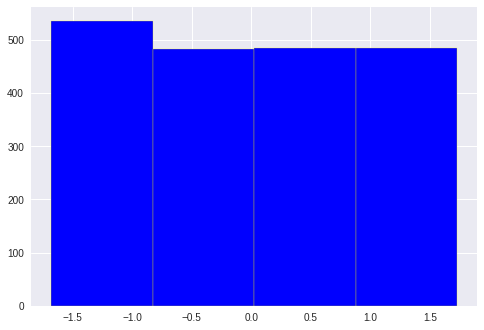

label
1.0    535
2.0    483
3.0    484
4.0    485
dtype: int64

In [83]:
bin_index = create_equal_bins(4)  
print('bins:',bin_index)
value_counter(dftrain,bin_index)

Bins:
bins: [-1.678397685369917, -1.1106014572077836, -0.5428052290456504, 0.024990999116482948, 0.5927872272786161, 1.1605834554407493, 1.7283796836028829]


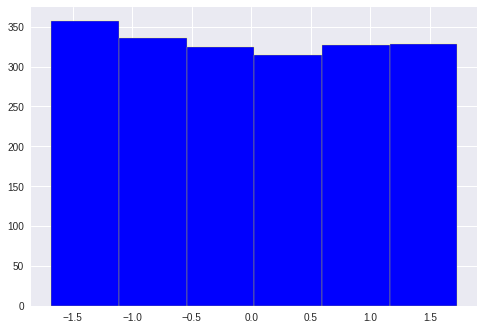

label
1.0    357
2.0    336
3.0    325
4.0    314
5.0    327
6.0    328
dtype: int64

In [84]:
bin_index = create_equal_bins(6)  
print('bins:',bin_index)
value_counter(dftrain,bin_index)

Bins:
bins: [-1.678397685369917, -1.4512791941050636, -1.2998668665951614, 0.2963936136393083, 1.3498488648281275, 1.728379683602883]


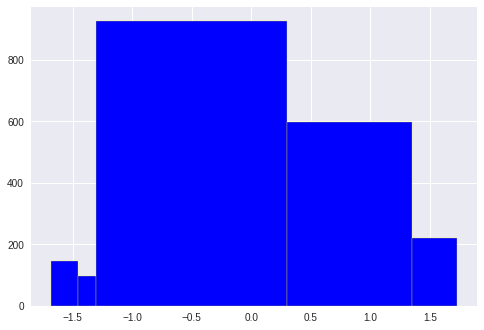

label
1.0    147
2.0     97
3.0    926
4.0    597
5.0    220
dtype: int64

In [85]:
bin_index = create_unequal_bins(dftrain)  
print('bins:',bin_index)
value_counter(dftrain,bin_index)

## **2.Onehot encoding**

A one hot encoding is a representation of categorical variables as binary vectors. 

This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1

**Why Use a One Hot Encoding?**

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are **categorical**.

We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.
In this dataset, we don't have categorical features and there are just numerical and binary values.

In [86]:
import pandas as pd


train_data=pd.read_csv(root+"train.csv")  #reading dataset
test_data = pd.read_csv(root+"test.csv")  #reading dataset

train_data.dropna(axis=0, subset=['price_range'], inplace=True)
target = train_data.price_range

# Drop data where the target is missing
cols_with_missing = [col for col in train_data.columns  if train_data[col].isnull().any()]                                  
candidate_train_predictors = train_data.drop(['price_range'] + cols_with_missing, axis=1)
candidate_test_predictors = test_data.drop(['id'] + cols_with_missing, axis=1)


low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [87]:
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [88]:
train_predictors.dtypes.sample(10)

m_dep            float64
px_width           int64
sc_w               int64
battery_power      int64
blue               int64
talk_time          int64
ram                int64
int_memory         int64
dual_sim           int64
mobile_wt          int64
dtype: object

In [89]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Mean Absolute Error when Dropping Categoricals: 0
Mean Abslute Error with One-Hot Encoding: 0


Applying to Multiple Files

In [91]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [92]:
predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)
mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Mean Absolute Error when Dropping Categoricals: 0
Mean Abslute Error with One-Hot Encoding: 0


## **3.log transform**

In [93]:
cat_vals

['blue', 'dual_sim', 'four_g', 'wifi', 'touch_screen', 'three_g']

In [94]:
df2=dftrain.copy()

In [95]:
#test data setting

for d in cat_vals:
   df2[d+'_transformed'] = np.log(df2[d] )


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [96]:
df2.head(5)

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,blue_transformed,dual_sim_transformed,four_g_transformed,wifi_transformed,touch_screen_transformed,three_g_transformed
0,-1.730752,-0.902372,-0.989802,0.830572,-1.018929,-0.762304,-1.043705,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,-1.786414,-1.005767,0.985850,-0.99975,NaN,NaN,NaN,-0.014251,NaN,NaN
1,-1.729021,-0.495015,1.009798,-1.252751,0.980932,-0.992642,0.957646,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,0.559501,0.993769,-1.013846,0.99975,0.00975,-0.019252,-0.043277,NaN,-0.00625,-0.58071
2,-1.727289,-1.537302,1.009798,-1.252751,0.980932,-0.531966,0.957646,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,0.559501,0.993769,-1.013846,0.99975,0.00975,-0.019252,-0.043277,NaN,-0.00625,-0.58071
3,-1.725557,-1.418964,1.009798,1.198217,-1.018929,-0.992642,-1.043705,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,0.559501,-1.005767,-1.013846,0.99975,0.00975,NaN,NaN,NaN,NaN,-0.58071
4,-1.723826,1.325574,1.009798,-0.394912,-1.018929,2.001753,0.957646,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,0.559501,0.993769,-1.013846,-0.99975,0.00975,NaN,-0.043277,NaN,-0.00625,-0.58071


we can not use log transform because we have some negative values in data and these values will transform to NaN

If we plot the data with a seaborn regression plot, we can easily spot a non-linear relation.

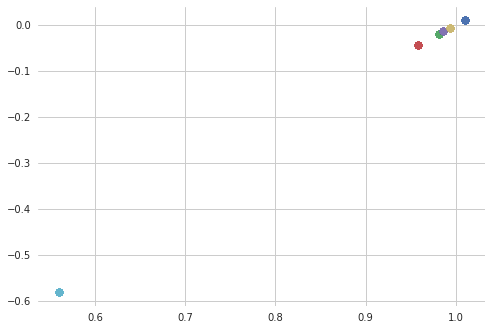

In [97]:
sns.set_style('whitegrid')
for d in cat_vals:
  plt.scatter(x =d, y =d+'_transformed', data = df2, cmap ='plasma')

the Pearson r value:

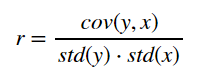

In [98]:
df3=dftrain.copy()

In [99]:
#test data setting
e=2.465
for d in cat_vals:
   df3[d+'_transformed'] = (e**(df3[d]))

In [379]:
df3.head(10)

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,blue_transformed,dual_sim_transformed,four_g_transformed,wifi_transformed,touch_screen_transformed,three_g_transformed
0,-1.730752,-0.902372,-0.989802,0.830572,-1.018929,-0.762304,-1.043705,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,-1.786414,-1.005767,0.985850,-0.99975,0.409429,0.398810,0.389995,2.433732,0.403574,0.199550
1,-1.729021,-0.495015,1.009798,-1.252751,0.980932,-0.992642,0.957646,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,0.559501,0.993769,-1.013846,0.99975,2.486886,2.422957,2.372587,0.400643,2.451183,1.656616
2,-1.727289,-1.537302,1.009798,-1.252751,0.980932,-0.531966,0.957646,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,0.559501,0.993769,-1.013846,0.99975,2.486886,2.422957,2.372587,0.400643,2.451183,1.656616
3,-1.725557,-1.418964,1.009798,1.198217,-1.018929,-0.992642,-1.043705,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,0.559501,-1.005767,-1.013846,0.99975,2.486886,0.398810,0.389995,0.400643,0.403574,1.656616
4,-1.723826,1.325574,1.009798,-0.394912,-1.018929,2.001753,0.957646,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,0.559501,0.993769,-1.013846,-0.99975,2.486886,0.398810,2.372587,0.400643,2.451183,1.656616
5,-1.722094,1.412052,-0.989802,-1.252751,0.980932,-0.301628,-1.043705,-0.553657,0.687376,0.670939,-1.538790,-0.480928,0.808715,0.931247,-0.974631,1.113987,-1.094253,-0.185031,0.559501,-1.005767,-1.013846,-0.99975,0.409429,2.422957,0.389995,0.400643,0.403574,1.656616
6,-1.720362,1.325574,-0.989802,0.217830,-1.018929,-0.071290,0.957646,-1.214970,1.034098,-0.035283,1.520869,0.013769,-0.595132,-0.540296,1.010191,0.164600,0.512579,1.279110,0.559501,-1.005767,0.985850,0.99975,0.409429,0.398810,2.372587,2.433732,0.403574,1.656616
7,-1.718631,1.628247,-0.989802,-1.252751,0.980932,-0.992642,-1.043705,-0.443438,1.034098,1.320663,-0.227507,-1.635222,-0.299941,-0.237195,-1.312963,0.876640,-0.635158,-1.100119,0.559501,0.993769,0.985850,-0.99975,0.409429,2.422957,0.389995,2.433732,2.451183,1.656616
8,-1.716899,0.469897,1.009798,-1.252751,-1.018929,-0.992642,-1.043705,1.154735,0.687376,0.953427,1.083775,0.673365,-0.583865,-0.961398,-0.945130,1.113987,-1.094253,1.645145,0.559501,-1.005767,-1.013846,-0.99975,2.486886,0.398810,0.389995,0.400643,0.403574,1.656616
9,-1.715168,-1.660192,1.009798,-1.130203,0.980932,-0.531966,0.957646,-1.270079,-1.392955,-1.334731,0.209587,0.838265,1.108412,-0.063664,-1.485356,1.588680,0.971674,0.181004,0.559501,-1.005767,-1.013846,-0.99975,2.486886,2.422957,2.372587,0.400643,0.403574,1.656616


[Text(0.5, 0, 'blue_transformed'),
 Text(1.5, 0, 'dual_sim_transformed'),
 Text(2.5, 0, 'four_g_transformed'),
 Text(3.5, 0, 'wifi_transformed'),
 Text(4.5, 0, 'touch_screen_transformed'),
 Text(5.5, 0, 'three_g_transformed')]

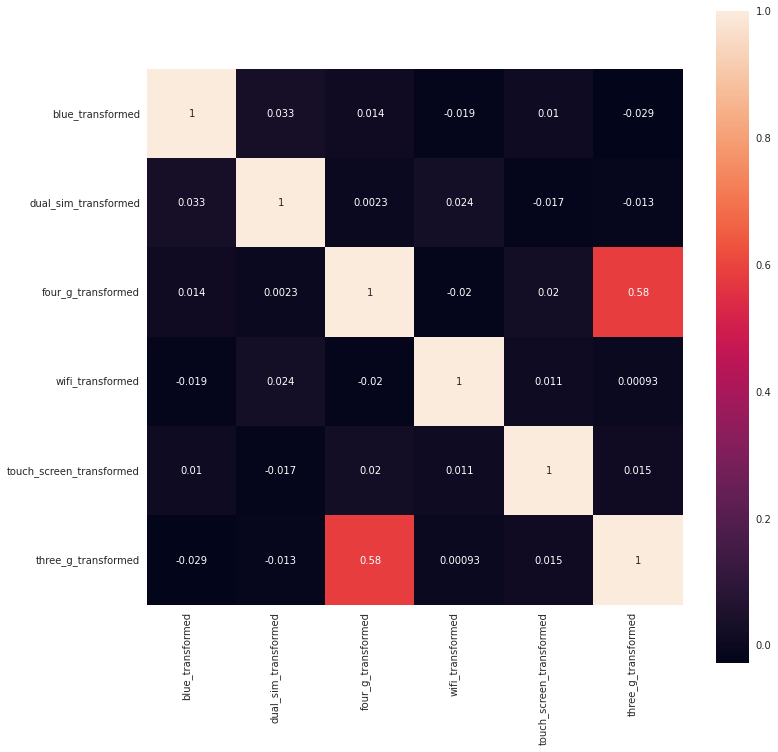

In [100]:
vals=['blue_transformed',	'dual_sim_transformed',	'four_g_transformed',	'wifi_transformed',	'touch_screen_transformed',	'three_g_transformed']
corr=df3[vals].corr()
f,ax=plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, center=None,annot=True,cmap=None,square=True)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='right')

In [101]:
#define cost function
def cost_function(e):
    r = np.corrcoef(df3[vals]) #returns correlation matrix
    #print each iteration
    print('r value: {:0.4f} exp: {:.4f}'.format(r[0][1],e)) 
    return -abs(r[0][1])

In [102]:
from scipy.optimize import minimize_scalar

minimize_scalar(cost_function,bounds=(0.1, 5), method='bounded')

r value: -0.8858 exp: 1.9716
r value: -0.8858 exp: 3.1284
r value: -0.8858 exp: 3.8433
r value: -0.8858 exp: 4.2851
r value: -0.8858 exp: 4.5582
r value: -0.8858 exp: 4.7269
r value: -0.8858 exp: 4.8312
r value: -0.8858 exp: 4.8957
r value: -0.8858 exp: 4.9355
r value: -0.8858 exp: 4.9602
r value: -0.8858 exp: 4.9754
r value: -0.8858 exp: 4.9848
r value: -0.8858 exp: 4.9906
r value: -0.8858 exp: 4.9942
r value: -0.8858 exp: 4.9964
r value: -0.8858 exp: 4.9978
r value: -0.8858 exp: 4.9986
r value: -0.8858 exp: 4.9992
r value: -0.8858 exp: 4.9995
r value: -0.8858 exp: 4.9997
r value: -0.8858 exp: 4.9998
r value: -0.8858 exp: 4.9999
r value: -0.8858 exp: 4.9999
r value: -0.8858 exp: 5.0000
r value: -0.8858 exp: 5.0000
r value: -0.8858 exp: 5.0000
r value: -0.8858 exp: 5.0000
r value: -0.8858 exp: 5.0000
r value: -0.8858 exp: 5.0000


     fun: -0.8858198860705119
 message: 'Solution found.'
    nfev: 29
  status: 0
 success: True
       x: 4.9999965123700685

The resulting exponent found, in just 29 iterations, is 4.999, is not close to the exponent we have used to generate the data that is 2.465.

This shows the value of the negative absolute value of Pearson r, which seems to be quite high.

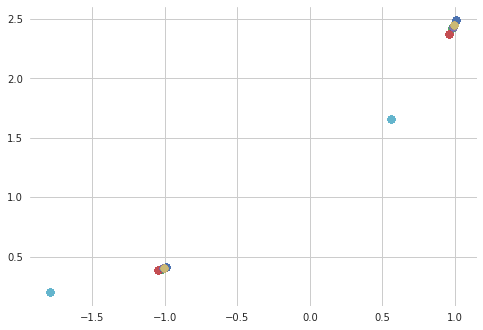

In [103]:
sns.set_style('whitegrid')
for d in cat_vals:
  plt.scatter(x =d, y =d+'_transformed', data = df3, cmap ='plasma')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


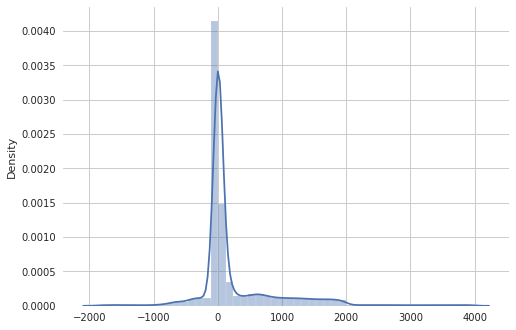

In [104]:
plt1=sns.distplot(data)

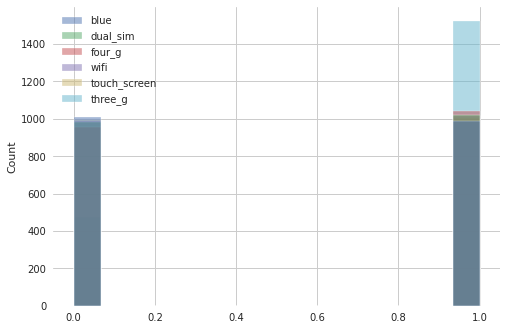

In [105]:
sns.histplot(data[cat_vals])

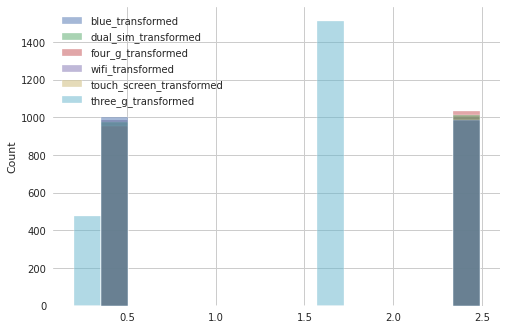

In [106]:
plt2=sns.histplot(df3[vals])

## **4.New feature :  area**

In [107]:
dftrain['Area']= dftrain['sc_h']*dftrain['sc_w']

In [108]:
dftrain.Area

0      -0.222120
1      -0.707558
2       0.268140
3       0.449348
4       0.883844
          ...   
1995   -0.066763
1996   -0.301310
1997    0.858755
1998    1.313056
1999   -0.644385
Name: Area, Length: 1988, dtype: float64

# decision tree

**Decision Tree Algorithm**
 
A decision tree is a simple representation for classifying examples. It is a **supervised machine learning technique** where the data is continuously split according to a certain parameter.
Decision tree analysis can help solve both **classification & regression** problems.

The decision tree algorithm breaks down a dataset into smaller subsets; while during the same time, an associated decision tree is incrementally developed.

A decision tree consists of nodes (that test for the value of a certain attribute), edges/branch (that correspond to the outcome of a test and connect to the next node or leaf) & leaf nodes (the terminal nodes that predict the outcome) that makes it a complete structure.  

**Types of Decision Trees**
 
Types of decision trees are based on the type of target variable we have. It can be of two types:

1. **Categorical Variable Decision Tree:** Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
2. **Continuous Variable Decision Tree:** Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

In [109]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [110]:
X = dftrain.drop(['price_range'], axis=1)
y = dftrain['price_range']
y = LabelEncoder().fit_transform(y)

print(X.shape)
print(y.shape)

(1988, 22)
(1988,)


In [111]:
col_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi','Area']

In [112]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

 Performing The decision tree analysis using scikit learn

In [113]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

we should estimate how accurately the classifier predicts the outcome.

The accuracy is computed by comparing actual test set values and predicted values.

In [114]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9296482412060302


Measuring the Impurity of Nodes Created Via Decision Tree Analysis

we will be varying the maximum depth of the tree as a control variable for pre-pruning. 

Let’s try max_depth=3

In [115]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9095477386934674


In [116]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
dtree.score(X_test,y_test)

0.932998324958124

## Decision Tree Classifier with criterion gini index

In [137]:
df=pd.read_csv(root+"train.csv").reset_index()  #reading dataset
X = df.drop(['price_range'], axis=1)
y = df['price_range']

In [138]:
!pip install category_encoders

In [139]:
df.columns

Index(['index', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [140]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
import category_encoders as ce

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
encoder = ce.OrdinalEncoder(cols=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi',])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [141]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [142]:
#Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [143]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2530


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy

In [144]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([3, 3, 3, ..., 3, 3, 3])

In [145]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.3231


Check for overfitting and underfitting

In [146]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.3231
Test set score: 0.2530


Here, the training-set accuracy score is 0.3231 while the test-set accuracy to be 0.2530. These two values are quite comparable. So, there is no sign of overfitting.

**Visualize decision-trees**

[Text(0.5, 0.875, 'X[16] <= 3.5\ngini = 0.75\nsamples = 1340\nvalue = [331, 338, 338, 333]'),
 Text(0.25, 0.625, 'X[8] <= 6.5\ngini = 0.732\nsamples = 206\nvalue = [44, 36, 53, 73]'),
 Text(0.125, 0.375, 'X[10] <= 7.5\ngini = 0.713\nsamples = 126\nvalue = [18, 22, 38, 48]'),
 Text(0.0625, 0.125, 'gini = 0.694\nsamples = 106\nvalue = [10, 21, 31, 44]'),
 Text(0.1875, 0.125, 'gini = 0.675\nsamples = 20\nvalue = [8, 1, 7, 4]'),
 Text(0.375, 0.375, 'X[11] <= 4.5\ngini = 0.731\nsamples = 80\nvalue = [26, 14, 15, 25]'),
 Text(0.3125, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [0, 0, 1, 7]'),
 Text(0.4375, 0.125, 'gini = 0.731\nsamples = 72\nvalue = [26, 14, 14, 18]'),
 Text(0.75, 0.625, 'X[8] <= 8.5\ngini = 0.749\nsamples = 1134\nvalue = [287, 302, 285, 260]'),
 Text(0.625, 0.375, 'X[12] <= 534.5\ngini = 0.749\nsamples = 964\nvalue = [260, 241, 240, 223]'),
 Text(0.5625, 0.125, 'gini = 0.745\nsamples = 619\nvalue = [185, 160, 148, 126]'),
 Text(0.6875, 0.125, 'gini = 0.747\nsamples = 345\nva

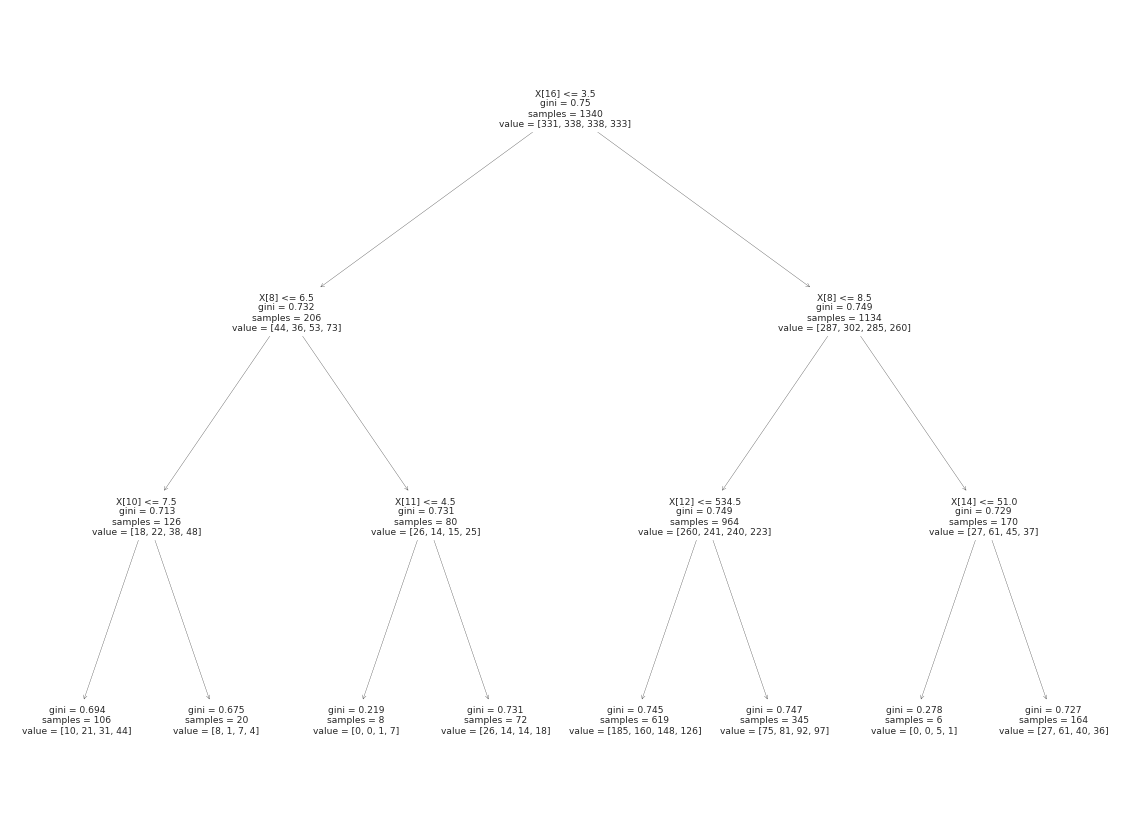

In [147]:
plt.figure(figsize=(20,15))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

## Decision Tree Classifier with criterion entropy 

In [148]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [149]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [150]:
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.2545


In [151]:
#Compare the train-set and test-set accuracy
#Now, we will compare the train-set and test-set accuracy to check for overfitting.

y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.3179


In [152]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.3179
Test set score: 0.2545


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.3179 while the test-set accuracy to be 0.2545. These two values are quite comparable. So, there is no sign of overfitting.

[Text(0.5, 0.875, 'X[16] <= 3.5\nentropy = 2.0\nsamples = 1340\nvalue = [331, 338, 338, 333]'),
 Text(0.25, 0.625, 'X[0] <= 1491.0\nentropy = 1.95\nsamples = 206\nvalue = [44, 36, 53, 73]'),
 Text(0.125, 0.375, 'X[8] <= 6.5\nentropy = 1.968\nsamples = 160\nvalue = [31, 36, 39, 54]'),
 Text(0.0625, 0.125, 'entropy = 1.855\nsamples = 97\nvalue = [9, 22, 29, 37]'),
 Text(0.1875, 0.125, 'entropy = 1.944\nsamples = 63\nvalue = [22, 14, 10, 17]'),
 Text(0.375, 0.375, 'X[14] <= 521.0\nentropy = 1.564\nsamples = 46\nvalue = [13, 0, 14, 19]'),
 Text(0.3125, 0.125, 'entropy = 1.471\nsamples = 19\nvalue = [8, 0, 8, 3]'),
 Text(0.4375, 0.125, 'entropy = 1.38\nsamples = 27\nvalue = [5, 0, 6, 16]'),
 Text(0.75, 0.625, 'X[8] <= 8.5\nentropy = 1.998\nsamples = 1134\nvalue = [287, 302, 285, 260]'),
 Text(0.625, 0.375, 'X[12] <= 534.5\nentropy = 1.998\nsamples = 964\nvalue = [260, 241, 240, 223]'),
 Text(0.5625, 0.125, 'entropy = 1.986\nsamples = 619\nvalue = [185, 160, 148, 126]'),
 Text(0.6875, 0.125,

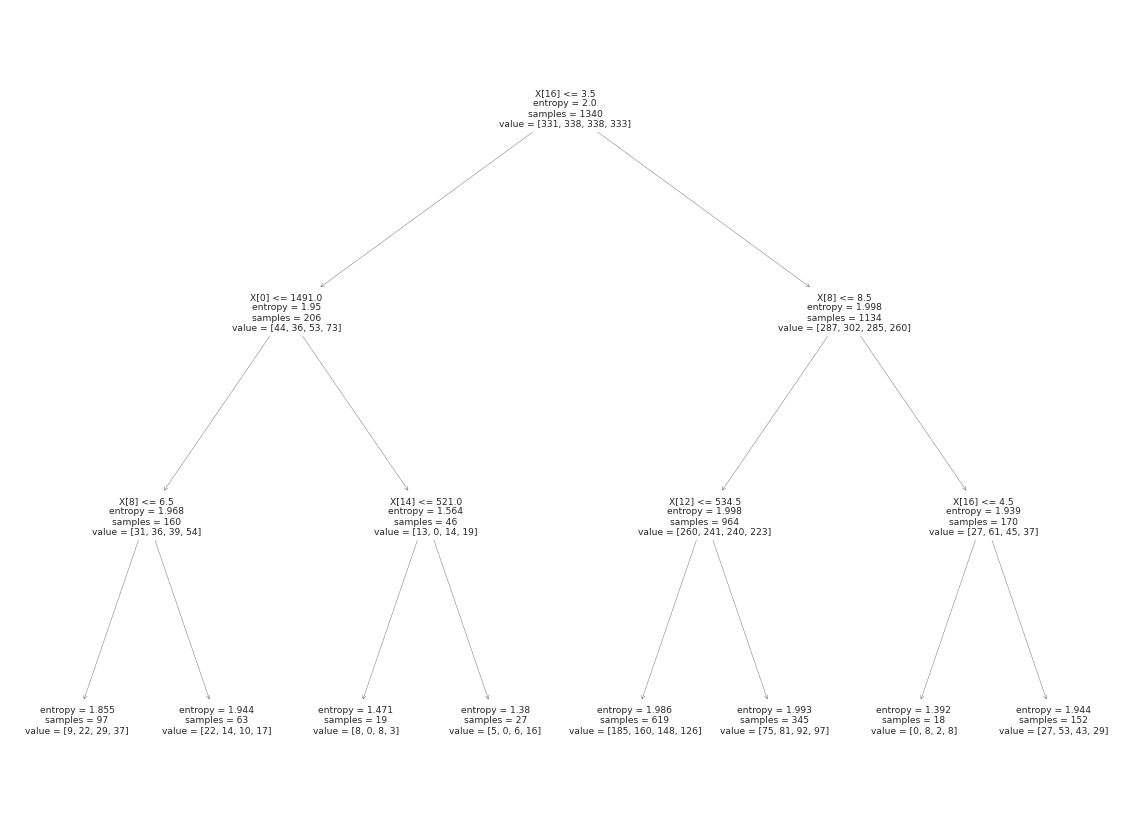

In [153]:
plt.figure(figsize=(20,15))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

**confusion matrix**

In [154]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[107  18   0  44]
 [105  22   0  35]
 [108  22   0  32]
 [112  16   0  39]]


In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.25      0.63      0.36       169
           1       0.28      0.14      0.18       162
           2       0.00      0.00      0.00       162
           3       0.26      0.23      0.25       167

    accuracy                           0.25       660
   macro avg       0.20      0.25      0.20       660
weighted avg       0.20      0.25      0.20       660



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. In this part, we build a Decision-Tree Classifier model to predict the price_range of the mobile .

2. we build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.2545.

3. In the model with criterion gini index, the training-set accuracy score is 0.3231 while the test-set accuracy to be 0.2530. 
These two values are quite comparable. So, there is no sign of overfitting.

4. Similarly, in the model with criterion entropy, the training-set accuracy score is 0.3179 while the test-set accuracy to be 0.2545.
We get the same values as in the case with criterion gini. So, there is no sign of overfitting.

5. In both the cases, the training-set and test-set accuracy score is near each other.
6. The confusion matrix and classification report yields very good model performance.